In [56]:
#pip install xgboost

# Importing the required libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [58]:
healthcare_dataset = pd.read_csv("healthcare_dataset.csv")

# Showing dataset info


In [59]:
print(healthcare_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

# Displaying the first four rows


In [60]:
healthcare_dataset.head(4)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal


# Checking the shape of the data


In [61]:
healthcare_dataset.shape

(55500, 15)

# Checking for null values

In [62]:
print(healthcare_dataset.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


# Dataset Information

In [63]:
print(healthcare_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

# Descriptive Analysis

In [64]:
healthcare_dataset.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224655,202.000000
50%,52.000000,25538.069380,302.000000
75%,68.000000,37820.508432,401.000000
max,89.000000,52764.276740,500.000000


# Converting data value from string to numerical

In [65]:
healthcare_dataset['Gender'] = healthcare_dataset['Gender'].astype('category')
healthcare_dataset['Blood Type'] = healthcare_dataset['Blood Type'].astype('category')
healthcare_dataset['Medical Condition'] = healthcare_dataset['Medical Condition'].astype('category')
healthcare_dataset['Insurance Provider'] = healthcare_dataset['Insurance Provider'].astype('category')
healthcare_dataset['Admission Type'] = healthcare_dataset['Admission Type'].astype('category')
healthcare_dataset['Medication'] = healthcare_dataset['Medication'].astype('category')
healthcare_dataset['Test Results'] = healthcare_dataset['Test Results'].astype('category')

healthcare_dataset['Date of Admission'] = pd.to_datetime(healthcare_dataset['Date of Admission'])
healthcare_dataset['Discharge Date'] = pd.to_datetime(healthcare_dataset['Discharge Date'])

# Visulalizations

## Histogram visualization based on the age distribution

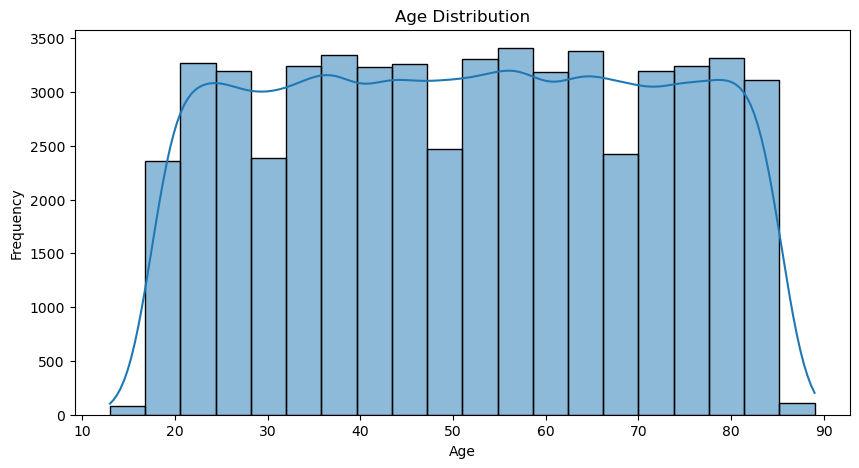

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(healthcare_dataset['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Boxplot visualization

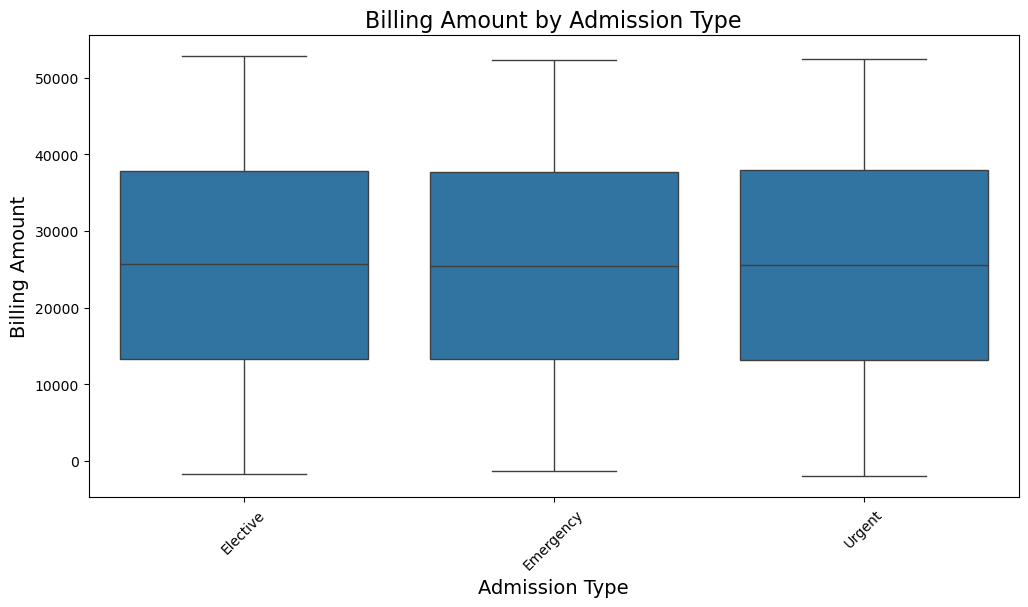

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=healthcare_dataset)
plt.title('Billing Amount by Admission Type', fontsize=16)
plt.xlabel('Admission Type', fontsize=14)
plt.ylabel('Billing Amount', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

## Bar plot visualization

### Visualization based on top ten hospitals

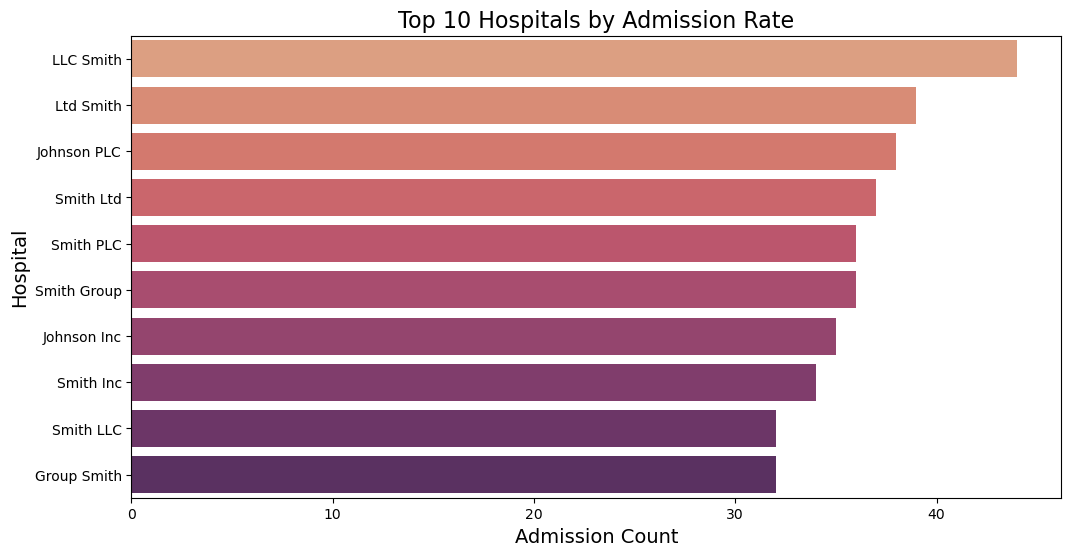

In [68]:
admission_rate = healthcare_dataset['Hospital'].value_counts().reset_index()
admission_rate.columns = ['Hospital', 'Admission Count']
top_10_hospitals = admission_rate.nlargest(10, 'Admission Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Admission Count', y='Hospital', data=top_10_hospitals, palette='flare')

plt.title('Top 10 Hospitals by Admission Rate', fontsize=16)
plt.xlabel('Admission Count', fontsize=14)
plt.ylabel('Hospital', fontsize=14)

plt.show()

### Barplot based on top ten doctors

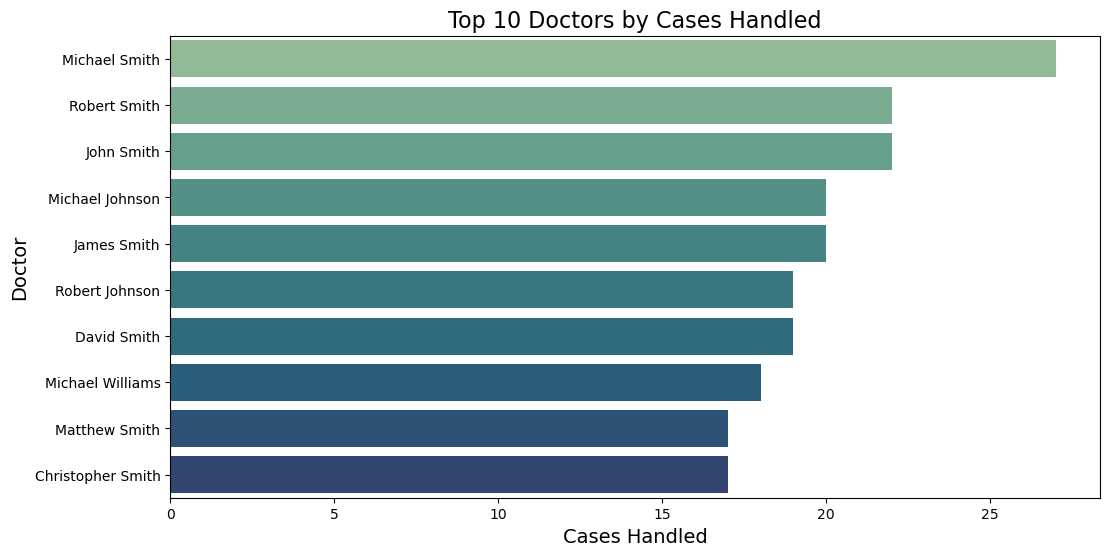

In [69]:
cases_handled = healthcare_dataset['Doctor'].value_counts().reset_index()
cases_handled.columns = ['Doctor', 'Cases Handled']
top_10_doctors = cases_handled.nlargest(10, 'Cases Handled')

plt.figure(figsize=(12, 6))
sns.barplot(x='Cases Handled', y='Doctor', data=top_10_doctors, palette='crest')

plt.title('Top 10 Doctors by Cases Handled', fontsize=16)
plt.xlabel('Cases Handled', fontsize=14)
plt.ylabel('Doctor', fontsize=14)

plt.show()

# Stanadarizing the dataset

In [70]:
le = LabelEncoder()
healthcare_dataset['Test Results'] = le.fit_transform(healthcare_dataset['Test Results']) 

train = healthcare_dataset.drop(columns='Test Results', axis=1).copy()
target = healthcare_dataset['Test Results'].copy()

In [71]:
numeric_columns = list(train.select_dtypes(np.number).columns) 
train[numeric_columns] = StandardScaler().fit_transform(train[numeric_columns])

cat_cols = train.select_dtypes('category').columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
train[encoded_cols] = encoder.transform(train[cat_cols])

train = train[numeric_columns + encoded_cols]
train.head()

,Age,Billing Amount,Room Number,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,-1.098824,-0.470261,0.233120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.533639,0.570250,-0.313556,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.247842,0.169990,-0.834199,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.200853,0.870465,1.291761,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.435636,-0.795211,1.361180,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Splitting the data into 80% train and 20% test 

In [72]:
train_inputs, test_inputs, train_target, test_target = split(train, target, test_size=0.25, random_state=42, stratify=target)

# Performing "Decision Tree Classifier" model

## Model prediction

In [73]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(train_inputs, train_target)

dt_predictions = dt_classifier.predict(test_inputs)


In [74]:
print("Decision Tree Classifier Report:")
print(classification_report(test_target, dt_predictions))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      4657
           1       0.40      0.40      0.40      4589
           2       0.40      0.41      0.40      4629

    accuracy                           0.40     13875
   macro avg       0.40      0.40      0.40     13875
weighted avg       0.40      0.40      0.40     13875



## Confusion matrix for descion tree

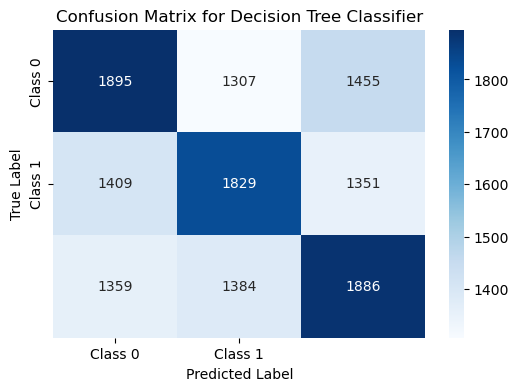

In [75]:
dt_cm = confusion_matrix(test_target, dt_predictions)


plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Performing "XG Boost Classifier" model

## Model prediction

In [76]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(train_inputs, train_target)
xgb_predictions = xgb_classifier.predict(test_inputs)

In [77]:
print("XGBoost Classifier Report:")
print(classification_report(test_target, xgb_predictions))

XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.37      0.39      0.38      4657
           1       0.37      0.38      0.38      4589
           2       0.37      0.35      0.36      4629

    accuracy                           0.37     13875
   macro avg       0.37      0.37      0.37     13875
weighted avg       0.37      0.37      0.37     13875



## Confusion matrix for descion tree

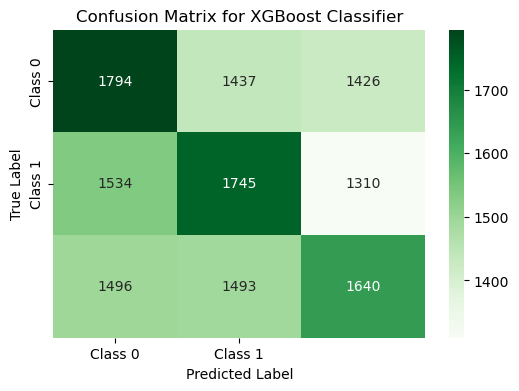

In [78]:
xgb_cm = confusion_matrix(test_target, xgb_predictions)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()